In [1]:
from src.SynthSeg import SynthSeg
from src.Labels import Labels
from src.ABCD import ABCD
from src.StatisticalAnalysis import StatisticalAnalysis
import pandas as pd

#### Labels

In [2]:
labels = Labels().df

#### Subset Datasets

SynthSeg (subset)

In [3]:
synthseg = SynthSeg(
    subjects=labels.index,
    run_qc=True,
    run_qc_min_score=0.65,
    run_qc_max_failed_regions=1
    )

synthseg.df.shape

(1782, 101)

In [4]:
synthseg.qc_df.shape

(1430, 101)

ABCD (subset) + QC

In [5]:
abcd = ABCD(synthseg.df.index)
abcd.df = abcd.match_synthseg_regions(synthseg.df)
abcd.df.shape

(1782, 101)

# Depression

## SynthSeg depressed vs control

In [6]:
# Create overall df
synthseg_with_labels = synthseg.df.join(labels)

In [7]:
synthseg_conditions = StatisticalAnalysis(
    synthseg.df[synthseg_with_labels["depress_dsm5"] == 0],
    synthseg.df[synthseg_with_labels["depress_dsm5"] == 1],
    ind=True,
)
synthseg_sig_vols, synthseg_all_stats = synthseg_conditions.compare()

synthseg_sig_vols

,feature,p_value
4,ctx-rh-postcentral,0.003214
3,ctx-lh-postcentral,0.007333
6,ctx-rh-supramarginal,0.020202
2,right cerebellum white matter,0.027419
5,ctx-rh-precentral,0.029681
0,left caudate,0.034681
1,left hippocampus,0.048953


In [24]:
for f in synthseg_sig_vols["feature"]:
    print("ROI:", f)
    print("Control:", round(synthseg.df[synthseg_with_labels["depress_dsm5"] == 0][f].mean()))
    print("Depressed:", round(synthseg.df[synthseg_with_labels["depress_dsm5"] == 1][f].mean()))
    print()

ROI: ctx-rh-postcentral
Control: 8662
Depressed: 8411

ROI: ctx-lh-postcentral
Control: 8468
Depressed: 8243

ROI: ctx-rh-supramarginal
Control: 9845
Depressed: 9649

ROI: right cerebellum white matter
Control: 13244
Depressed: 13020

ROI: ctx-rh-precentral
Control: 10467
Depressed: 10248

ROI: left caudate
Control: 4288
Depressed: 4223

ROI: left hippocampus
Control: 4004
Depressed: 3962



/nadata/cnl/home/mwagner/projects/SynthSeg/abcd-code/analysis/src/StatisticalAnalysis.py:96: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.dataset_1["dataset"] = self.dataset_names[0]
/nadata/cnl/home/mwagner/projects/SynthSeg/abcd-code/analysis/src/StatisticalAnalysis.py:97: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.dataset_2["dataset"] = self.dataset_names[1]
/nadata/cnl/home/mwagner/projects/SynthSeg/abcd-code/analysis/src/StatisticalAnalysis.py:96: SettingWithCopyWarning: 
A value is tryin

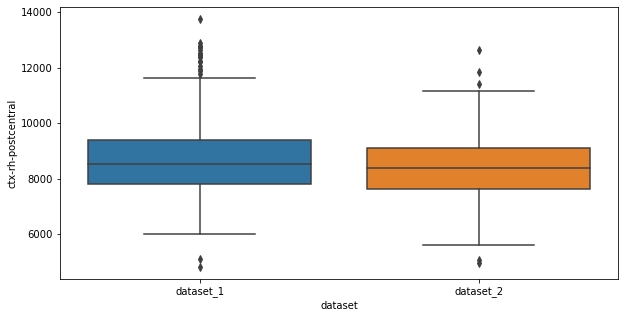

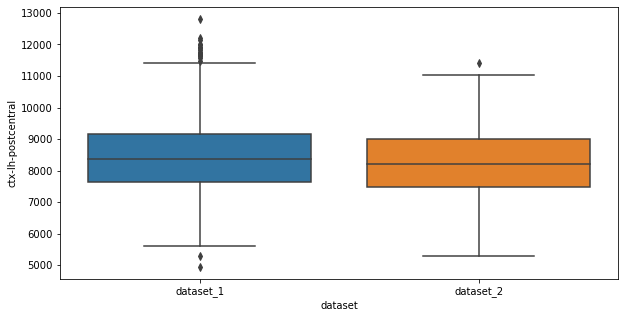

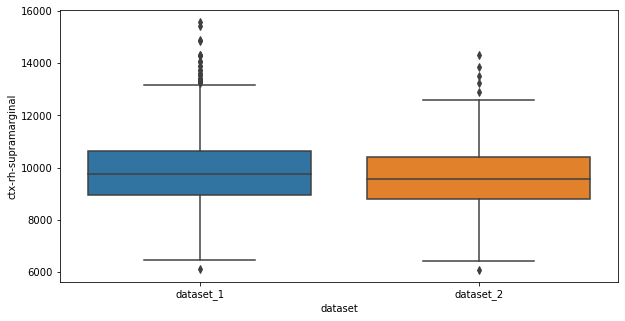

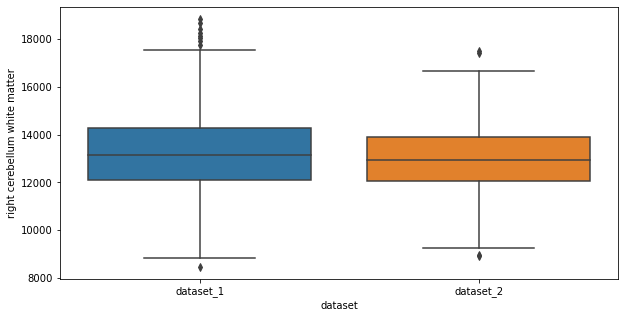

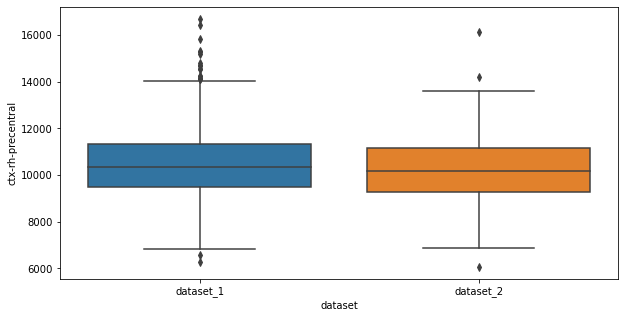

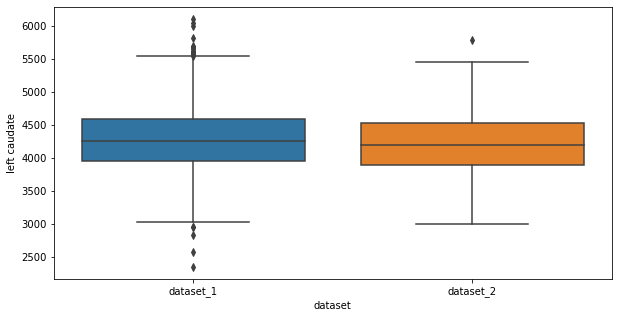

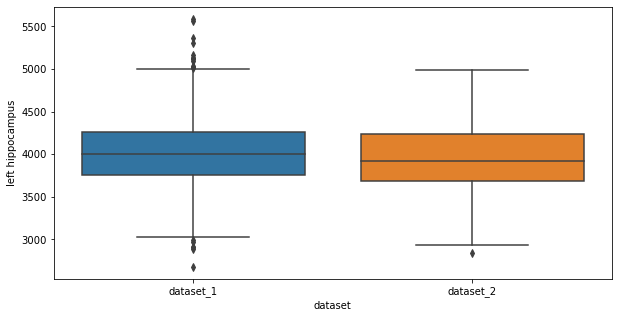

In [10]:
for f in synthseg_sig_vols["feature"]:
    synthseg_conditions.plot_feat(f)

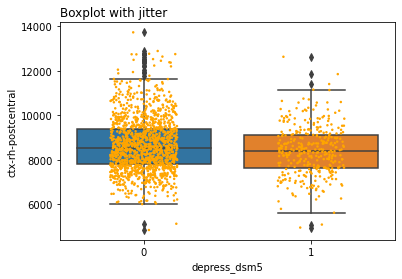

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# add stripplot
ax = sns.stripplot(x='depress_dsm5', y='ctx-rh-postcentral', data=synthseg_with_labels, color="orange", jitter=0.2, size=2.5)

# boxplot
ax = sns.boxplot(x='depress_dsm5', y='ctx-rh-postcentral', data=synthseg_with_labels)

# add title
plt.title("Boxplot with jitter", loc="left")

# show the graph
plt.show()

In [ ]:
def plot_roi(roi):
    

In [13]:
synthseg.df[synthseg_with_labels["depress_dsm5"] == 0]["ctx-rh-postcentral"].mean()

8661.901494051786

## SynthSeg (with qc) depressed vs control

In [8]:
# Create overall df
synthseg_qc_with_labels = synthseg.qc_df.join(labels)

In [9]:
synthseg_qc_conditions = StatisticalAnalysis(
    synthseg.qc_df[synthseg_qc_with_labels["depress_dsm5"] == 0],
    synthseg.qc_df[synthseg_qc_with_labels["depress_dsm5"] == 1],
    ind=True,
)
synthseg_qc_sig_vols, synthseg_qc_all_stats = synthseg_qc_conditions.compare()

synthseg_qc_sig_vols

,feature,p_value
8,ctx-rh-postcentral,0.001683
7,ctx-lh-postcentral,0.003268
5,right cerebellum white matter,0.010176
4,left hippocampus,0.020209
3,brain-stem,0.028090
2,left caudate,0.031763
6,right ventral DC,0.038110
1,left cerebellum white matter,0.041498
10,ctx-rh-supramarginal,0.042807
9,ctx-rh-precentral,0.045504


In [33]:
for f in synthseg_qc_sig_vols["feature"]:
    print("ROI:", f)
    print("Control:", round(synthseg.qc_df[synthseg_qc_with_labels["depress_dsm5"] == 0][f].mean()))
    print("Depressed:", round(synthseg.qc_df[synthseg_qc_with_labels["depress_dsm5"] == 1][f].mean()))
    print()

ROI: ctx-rh-postcentral
Control: 8678
Depressed: 8385

ROI: ctx-lh-postcentral
Control: 8479
Depressed: 8214

ROI: right cerebellum white matter
Control: 13246
Depressed: 12946

ROI: left hippocampus
Control: 3989
Depressed: 3927

ROI: brain-stem
Control: 21573
Depressed: 21244

ROI: left caudate
Control: 4319
Depressed: 4246

ROI: right ventral DC
Control: 4221
Depressed: 4157

ROI: left cerebellum white matter
Control: 13893
Depressed: 13632

ROI: ctx-rh-supramarginal
Control: 9848
Depressed: 9635

ROI: ctx-rh-precentral
Control: 10497
Depressed: 10263

ROI: left cerebral cortex
Control: 301665
Depressed: 297218



## ABCD depressed vs control

In [14]:
# Create overall df
abcd_with_labels = abcd.df.join(labels)

In [15]:
abcd_conditions = StatisticalAnalysis(
    abcd.df[abcd_with_labels["depress_dsm5"] == 0],
    abcd.df[abcd_with_labels["depress_dsm5"] == 1],
    ind=True,
)
abcd_sig_vols, abcd_all_stats = abcd_conditions.compare()

abcd_sig_vols

,feature,p_value
12,ctx-rh-postcentral,0.000346
6,ctx-lh-superiorparietal,0.000770
5,ctx-lh-postcentral,0.001783
0,ctx-lh-inferiorparietal,0.001919
16,ctx-rh-frontalpole,0.002564
2,ctx-lh-parahippocampal,0.002809
15,ctx-rh-supramarginal,0.002826
11,ctx-rh-paracentral,0.005236
13,ctx-rh-precentral,0.006550
8,ctx-rh-caudalanteriorcingulate,0.012916
